In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [34]:
df=pd.read_csv('property.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****","DESCRIPCION DE LA PROPIEDAD: Departamento de 140,65 metros cubiertos según escritura. Segundo piso por escalera. Dormitorios siete /",Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,"PH reciclado en Boedo a una cuadra de la plaza sin expensas, solo 4 propietarios en el edificio en muy buen estado.58 m2 cubiertos + 12 m2 de patioabajo: living comedor doble altura patio, toilette, cocina y lavaderoarriba: dormitorio con buen placard y baño completo.Impecable. Luz, sol y verde.Claudia Mascitti CMCPSI 6019",PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Palermo,"2 ambienets amplio , excelente estado , patio , cocina comedor . 45 mts. Migliorisi VE - Se deja constancia que las caracteristicas, medidas, expensas y superficies consignadas son aproximadas, sujetos a verificación y/o ajuste. El precio del inmueble puede ser modificado sin previo aviso. Fotos de carácter no contractual. Las unidades publicadas están sujetas a disponibilidad.",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH 2 AMBIENTES,"HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE RECICLADOS!!!LIVING/COMEDOR AL CONTRAFRENTE CON SALIDA A PATIO CON ADOQUINES Y PALMERA-DORMITORIO CON BALCON-COCINA Y BAÑO-TERRAZA//SUPER LUMINOSO Y CON EXCELENTE VENTILACION!!!ESTA UBICADO EN PLANTA BAJA, ES EL DEPTO DEL MEDIO POR PASILLOEXCELENTE UBICACION, DONDE NO SE PERMITEN LA CONSTRUCCION DE EDIFICIOS, POR LO QUE SE GARANTIZA EL AIRE Y EL SOL.APTO PROFESIONALNO PAGA EXPENSAS!!!Sup.Total: 85 MtsSup.Cub: 50 MtsSup.desc: 35 MtsSe deja constancia que las medidas (tanto totales como parciales), superficies, m2 y proporciones indicadas en el presente son aproximadas y sujetas a verificación, variación y/o ajuste. Las expensas pueden sufrir variaciones.",PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,"58 entre 1 y 2 Venta de departamento en ph.1 Dormitorio , La Plata","58 entre 1 y 2 Venta de departamento en PH. Primer piso por escaleras. Living comedor, cocina integrada, 1 dormitorio , baño con ducha, terraza de 15 metros, tipo de calefacción por tiro balanceado, ventilación cruzada, zona de facultades. SIN EXPENSAS",PH,Venta


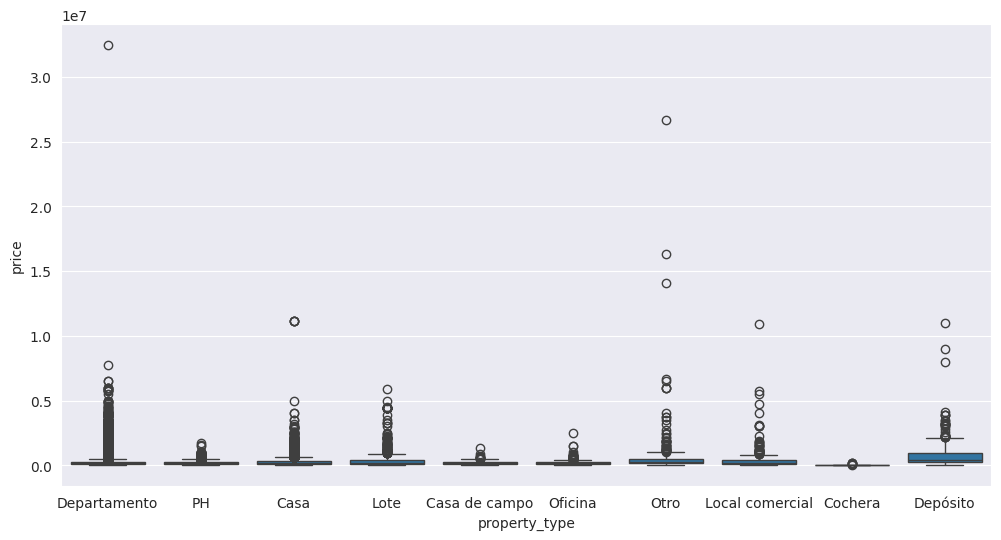

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='property_type', y='price', data=df)
plt.show()

<Axes: xlabel='property_type', ylabel='price'>

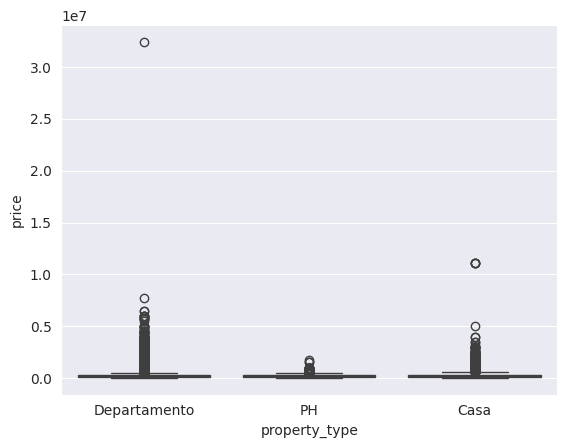

In [36]:
new_df=df[(df['property_type']== 'Departamento') | (df['property_type']== 'PH') | (df['property_type']=='Casa')]
x=new_df[['lat','lon','rooms','bathrooms','surface_total','surface_covered','property_type']]
y=new_df['price']
sns.boxplot(x='property_type', y='price', data=new_df)

<Axes: xlabel='property_type', ylabel='price'>

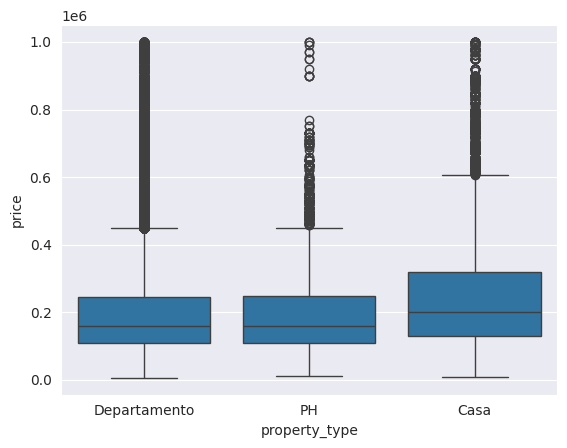

In [37]:
sns.boxplot(x='property_type', y='price', data=new_df.query('price<=1000000') )

In [38]:
def obtener_coeficientes(modelo,lista_variables):
    lista_variables=['intercepto']+lista_variables
    #intercepto
    intercepto=modelo.intercept_
    coeficiente=list(modelo.coef_)
    lista_coeficiente=[intercepto]+coeficiente
    return pd.DataFrame({'variable': lista_variables, 'coeficientes': lista_coeficiente})


In [39]:
from sklearn.model_selection import train_test_split
semilla=1992
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=semilla)

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
one_hot_encoder=OneHotEncoder(categories=[['PH', 'Casa','Departamento']], drop='first')

In [42]:
one_hot_encoder.fit(x_train[['property_type']])

OneHotEncoder(categories=[['PH', 'Casa', 'Departamento']], drop='first')

In [43]:
one_hot_encoder.categories_

[array(['PH', 'Casa', 'Departamento'], dtype=object)]

In [44]:
matriz_dummies=one_hot_encoder.transform(x_train[['property_type']]).toarray()
matriz_dummies

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [45]:
nombres_dummies=one_hot_encoder.get_feature_names_out(['property_type'])
nombres_dummies

array(['property_type_Casa', 'property_type_Departamento'], dtype=object)

In [46]:
df_dummies=pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=x_train.index)
df_dummies.head()

,property_type_Casa,property_type_Departamento
83463,0.0,1.0
129066,0.0,1.0
107496,0.0,1.0
51211,1.0,0.0
33705,0.0,1.0


In [47]:
x_train=x_train.join(df_dummies)
x_train.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type,property_type_Casa,property_type_Departamento
83463,-34.604826,-58.427388,3.0,2.0,NaN,NaN,Departamento,0.0,1.0
129066,-34.595920,-58.394791,3.0,2.0,87.0,80.0,Departamento,0.0,1.0
107496,NaN,NaN,4.0,2.0,88.0,84.0,Departamento,0.0,1.0
51211,-34.494594,-58.518814,5.0,3.0,260.0,160.0,Casa,1.0,0.0
33705,-34.614576,-58.437245,5.0,2.0,172.0,140.0,Departamento,0.0,1.0


In [48]:
variables_exogenas=['surface_total', 'property_type_Casa', 'property_type_Departamento']

x_train_model=x_train[variables_exogenas].fillna(x_train[variables_exogenas].mean())
modelo_lineal_sup_property=LinearRegression(fit_intercept=True)

modelo_lineal_sup_property.fit(x_train_model, y_train)

coeiecientes_modelo=obtener_coeficientes(modelo_lineal_sup_property, variables_exogenas)
coeiecientes_modelo

,variable,coeficientes
0,intercepto,186730.671657
1,surface_total,10.347301
2,property_type_Casa,84864.602996
3,property_type_Departamento,49795.192385


In [49]:
x_train.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type,property_type_Casa,property_type_Departamento
83463,-34.604826,-58.427388,3.0,2.0,NaN,NaN,Departamento,0.0,1.0
129066,-34.595920,-58.394791,3.0,2.0,87.0,80.0,Departamento,0.0,1.0
107496,NaN,NaN,4.0,2.0,88.0,84.0,Departamento,0.0,1.0
51211,-34.494594,-58.518814,5.0,3.0,260.0,160.0,Casa,1.0,0.0
33705,-34.614576,-58.437245,5.0,2.0,172.0,140.0,Departamento,0.0,1.0


In [50]:
new_dff=df[['lat','lon','rooms','bathrooms','surface_total','surface_covered', 'property_type']]
new_dff.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type
0,-34.605880,-58.384949,7.0,2.0,140.0,140.0,Departamento
1,-34.624056,-58.412110,2.0,2.0,70.0,58.0,PH
2,-34.593569,-58.427474,2.0,1.0,45.0,45.0,PH
3,-34.581294,-58.436754,2.0,1.0,85.0,50.0,PH
4,-34.914194,-57.938219,2.0,1.0,50.0,35.0,PH


In [60]:
x_train['interaccion_sup_casa']=x_train['property_type_Casa']+x_train['surface_total']
x_train['interaccion_sup_departament']=x_train['property_type_Departamento']+x_train['surface_total']

In [62]:
values_exogenes=['surface_total', 'property_type_Casa', 'property_type_Departamento', 'interaccion_sup_casa', 'interaccion_sup_departament']

x_train_model=x_train[values_exogenes].fillna(x_train[values_exogenes].mean())

modelo_train=LinearRegression(fit_intercept=True)

modelo_train.fit(x_train_model, y_train)

coeficinetes_interaccion_train=obtener_coeficientes(modelo_train, values_exogenes)
coeficinetes_interaccion_train

,variable,coeficientes
0,intercepto,183868.150451
1,surface_total,-645871.276960
2,property_type_Casa,-206891.421113
3,property_type_Departamento,-296228.535069
4,interaccion_sup_casa,290888.428735
5,interaccion_sup_departament,354993.559643
